# 1. Overview

## 1.1 Import Dataset

In [1]:
import pandas as pd
dataset = pd.read_table("crx.data",header=None,delimiter = ',')
dataset = dataset.rename(columns=lambda s: 'C'+str(s+1))
dataset

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## 1.2 Explore the Data

In [2]:
# Inspecting the df, we find that the some columns has hidden missing values indicated by '?'
# Replace all instances of '?' with NaN
import numpy as np
dataset=dataset.replace('?',np.NaN)

# 95% data for modeling; 5% data for predictions
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (656, 16)
Unseen Data For Predictions: (34, 16)


# 2. Data Preprocessing

In [3]:
from pycaret.classification import *
clf = setup(data,
            target='C16',
            session_id = 123,
            silent = True,
            profile = True,
            train_size = 0.75,
            numeric_imputation = 'mean',
            categorical_imputation = 'constant',
            numeric_features = ['C2'],
            categorical_features = ['C11'],
            ignore_features = None,
            high_cardinality_features = ['C14'],
            handle_unknown_categorical = True,
            unknown_categorical_method = 'least_frequent',
            normalize = False,
            transformation = False,
            combine_rare_levels = True,
            remove_multicollinearity = True,
            pca = False,
            ignore_low_variance = True)

In [4]:
# Preprocessed dataset
clf[0].to_csv("crx_preprocessed.csv")
clf[0]

,C2,C3,C8,C14,C15,C1_a,C1_not_available,C4_l,C5_not_available,C5_p,...,C11_3.0,C11_4.0,C11_5.0,C11_6.0,C11_7.0,C11_9.0,C11_others_infrequent,C12_f,C13_p,C13_s
0,21.92,0.500,0.125,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,16.33,0.210,0.125,32.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,39.17,1.710,0.125,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.58,5.000,5.000,126.0,3065.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.83,0.000,0.665,30.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,20.00,7.000,0.500,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
652,16.92,0.335,0.290,32.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
653,37.33,6.500,4.250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654,22.92,1.250,0.250,33.0,809.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Modeling

## 3.1 Comparing All Models 

In [5]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.862000,0.910500,0.860600,0.887300,0.873400,0.721700
1,Extra Trees Classifier,0.861900,0.920600,0.882300,0.872700,0.876200,0.719700
2,Extreme Gradient Boosting,0.855800,0.929100,0.863800,0.879600,0.869300,0.708000
3,CatBoost Classifier,0.855800,0.931200,0.856300,0.883900,0.867700,0.708800
4,Linear Discriminant Analysis,0.853800,0.916100,0.805300,0.923500,0.858500,0.708600
5,Ridge Classifier,0.851800,0.000000,0.805300,0.919900,0.856900,0.704500
6,Light Gradient Boosting Machine,0.849700,0.922900,0.871200,0.863200,0.865000,0.695000
7,Ada Boost Classifier,0.837500,0.907900,0.834500,0.871100,0.850700,0.672300
8,Random Forest Classifier,0.835600,0.904400,0.831100,0.869100,0.847700,0.669100
9,Gradient Boosting Classifier,0.835500,0.918300,0.848900,0.862200,0.851400,0.666300


## 3.2 Create a Model

In [6]:
m = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9000,0.9448,0.8929,0.9259,0.9091,0.7981
1,0.7800,0.8239,0.8929,0.7576,0.8197,0.5424
2,0.8367,0.8973,0.8519,0.8519,0.8519,0.6700
3,0.8980,0.9739,0.9259,0.8929,0.9091,0.7929
4,0.8776,0.9360,0.8889,0.8889,0.8889,0.7525
5,0.8163,0.8662,0.7778,0.8750,0.8235,0.6334
6,0.8571,0.9234,0.9259,0.8333,0.8772,0.7076
7,0.8776,0.9428,0.8519,0.9200,0.8846,0.7546
8,0.8776,0.9402,0.8889,0.8889,0.8889,0.7525
9,0.8980,0.9571,0.9259,0.8929,0.9091,0.7929


## 3.3 Tune the Model

In [7]:
tuned = tune_model('et', optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8800,0.9253,0.8571,0.9231,0.8889,0.7588
1,0.8200,0.8328,0.8929,0.8065,0.8475,0.6293
2,0.7959,0.9040,0.8148,0.8148,0.8148,0.5875
3,0.8980,0.9722,0.8889,0.9231,0.9057,0.7946
4,0.8980,0.9343,0.8889,0.9231,0.9057,0.7946
5,0.7959,0.8889,0.7407,0.8696,0.8000,0.5944
6,0.8571,0.9377,0.9259,0.8333,0.8772,0.7076
7,0.8776,0.9377,0.8148,0.9565,0.8800,0.7566
8,0.8980,0.9832,0.9259,0.8929,0.9091,0.7929
9,0.9388,0.9731,0.9259,0.9615,0.9434,0.8768


In [8]:
ensembled = ensemble_model(tuned, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8800,0.9367,0.8571,0.9231,0.8889,0.7588
1,0.8000,0.8490,0.8571,0.8000,0.8276,0.5902
2,0.8163,0.9024,0.8148,0.8462,0.8302,0.6303
3,0.8980,0.9747,0.8889,0.9231,0.9057,0.7946
4,0.8776,0.9394,0.8519,0.9200,0.8846,0.7546
5,0.7959,0.8956,0.7407,0.8696,0.8000,0.5944
6,0.8571,0.9327,0.9259,0.8333,0.8772,0.7076
7,0.8367,0.9461,0.8148,0.8800,0.8462,0.6728
8,0.8776,0.9680,0.8889,0.8889,0.8889,0.7525
9,0.9388,0.9714,0.9259,0.9615,0.9434,0.8768


# 4. Plotting

## 4.1 AUC Plot

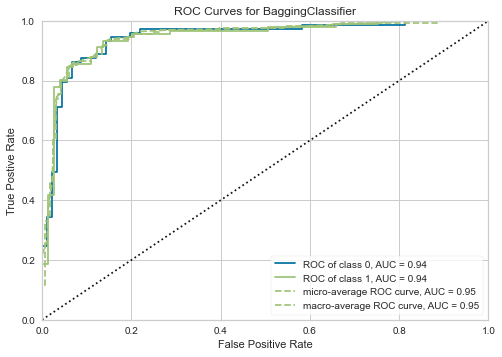

In [9]:
plot_model(ensembled, plot = 'auc')

## 4.2 Precision-Recall Curve

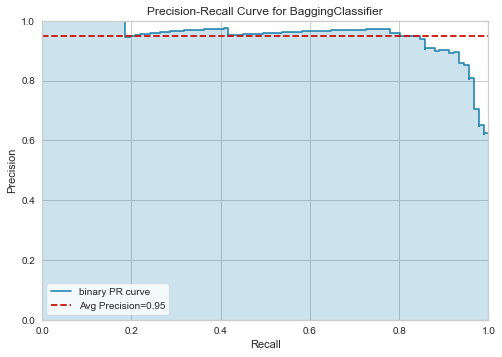

In [10]:
plot_model(ensembled, plot = 'pr')

## 4.3 Confusion Matrix

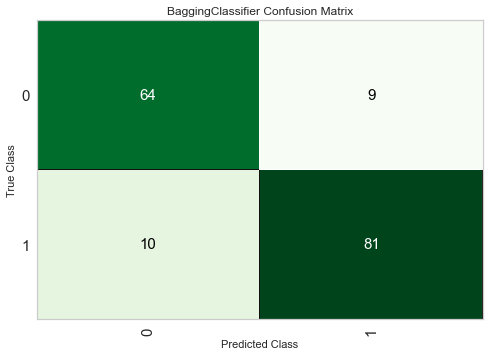

In [11]:
plot_model(ensembled, plot = 'confusion_matrix')

# 5. Model evaluation

In [12]:
predictions_holdout = predict_model(ensembled)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Bagging Classifier,0.8841,0.9448,0.8901,0.9,0.895,0.7658


# 6. Finalizing the Model

In [13]:
model = finalize_model(ensembled)
model

BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=110,
                                                      max_features='sqrt',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=5,
                                                      min_weight_fraction_leaf=0.0,
                                

# 7. Predictions

In [14]:
unseen_predictions = predict_model(model, data=data_unseen)
unseen_predictions.to_csv("crx_predicted.csv")
unseen_predictions

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,Label,Score
0,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+,0,0.1143
1,a,41.00,2.040,y,p,q,h,0.125,t,t,23,t,g,00455,1236,+,0,0.2049
2,b,41.50,1.540,u,g,i,bb,3.500,f,f,0,f,g,00216,0,+,1,0.7994
3,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-,0,0.2922
4,a,24.75,12.500,u,g,aa,v,1.500,t,t,12,t,g,00120,567,+,0,0.1417
5,a,47.42,8.000,u,g,e,bb,6.500,t,t,6,f,g,00375,51100,+,0,0.1323
6,b,25.00,12.500,u,g,aa,v,3.000,t,f,0,t,s,00020,0,+,0,0.1946
7,a,41.33,1.000,u,g,i,bb,2.250,t,f,0,t,g,00000,300,+,0,0.1969
8,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,+,0,0.0660
9,b,60.08,14.500,u,g,ff,ff,18.000,t,t,15,t,g,00000,1000,+,0,0.1684


# 8. Saving the Model

In [15]:
save_model(model, 'model')

Transformation Pipeline and Model Succesfully Saved


# 9. Saving the Experiment

In [16]:
save_experiment('experiment_05032020')

Experiment Succesfully Saved


# 10. View Experiment Steps

In [17]:
saved_experiment = load_experiment('experiment_05032020')

,Object
0,Classification Setup Config
1,X_training Set
2,y_training Set
3,X_test Set
4,y_test Set
5,Transformation Pipeline
6,Compare Models Score Grid
7,Extra Trees Classifier
8,Extra Trees Classifier Score Grid
9,Tuned ExtraTreesClassifier
